In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    name: str
    values: list[int]
    operation: str
    result: str

In [4]:
def evaluate(state: AgentState) -> AgentState:
    """this function handles multiple different inputs"""
    if state['operation'] == '+':
        state['result'] = f'Hi there {state["name"]}, the sum of your values is {sum(state["values"])}'
    elif state['operation'] == '*':
        product = 1
        for v in state['values']:
            product *= v
        state['result'] = f'Hi there {state["name"]}, the product of your values is {product}'
    else:
        state['result'] = f'Hi there {state["name"]}, unknown operation {state["operation"]}'
    return state

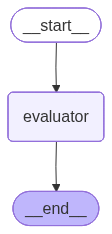

In [7]:
graph = StateGraph(AgentState)
graph.add_node('evaluator',evaluate)
graph.set_entry_point('evaluator')
graph.set_finish_point('evaluator')

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = app.invoke({
    'name': "Jack Sparrow",
    'values': [1,2,3,4],
    'operation': '*'
})

print(result['result'])

Hi there Jack Sparrow, the product of your values is 24
